# 3) Product categories

Products are uniquely identified through the `StockCode` variable. A shrort description of the products is given in the `Description` variable.

In this section, we use the content of the variable `Description` to group the products into different categories.

We extract keywords from `Description` with the function below.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/Customer Segmentation/Data/'

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df_cleaned = pd.read_csv(relative_path + 'data_cleaned.csv', encoding='latin', dtype={'CustomerID': str}) 

df_dropna.drop(['Unnamed: 0'], axis=1, inplace=True)
df_cleaned.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1,  inplace=True)
df_cleaned.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [ ]:

# The function to extract keywords from (unique) Descriptions
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


This function takes the dataframe and analyzes the content of the `Description` column by performing the following operations:

* extract the names (proper, common) appearing in the products description
* for each name, extract the root of the word and aggregate the set of names associated with this particular root
* count the number of times each root appears in the dataframe
* when several words are listed for the same root, we consider that the keyword associated with this root is the shortest one (this systematically selects the singular when there are singular/plural variants)

## 3.1) Unique descriptions
**Task**: extract unique descriptions. How many of them we have?
Use keywords_invertory function.

In [ ]:
df_produits = pd.DataFrame(df_dropna['Description'].unique()).rename(columns = {0:'Description'})
print("number of different descriptions is:", len(df_produits))
# use the function
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)
print(keywords,'\n', keywords_roots,'\n',  keywords_select,'\n',  count_keywords)

number of different descriptions is: 3896
Nb of keywords in variable 'Description': 1483
['heart', 'holder', 'metal', 'lantern', 'cream', 'cupid', 'coat', 'hanger', 'union', 'flag', 'water', 'bottle', 'nest', 'box', 'glass', 'star', 'hand', 'jack', 'warmer', 'dot', 'bird', 'ornament', 'poppy', 'playhouse', 'bedroom', 'kitchen', 'feltcraft', 'princess', 'charlotte', 'doll', 'ivory', 'cosy', 'colour', 'teaspoons', 'vintage', 'jigsaw', 'block', 'alphabet', 'home', 'building', 'word', 'love', 'recipe', 'england', 'jam', 'jar', 'rack', 'paris', 'fashion', 'bath', 'alarm', 'clock', 'bakelike', 'pink', 'green', 'panda', 'bunny', 'sheet', 'tape', 'globe', 'head', 'tail', 'game', 'set/2', 'retrospot', 'tea', 'towel', 'round', 'snack', 'woodland', 'spaceboy', 'lunch', 'i', 'london', 'circus', 'bag', 'design', 'toadstool', 'night', 'light', 'seaside', 'puzzles', 'mini', 'parade', 'paint', 'postage', 'paper', 'chain', 'christmas', 'parasol', 'coffee', 'mug', 'planet', 'billboard', 'love/hate', 'wo

The function returns three variables:
* `keywords`: the list of extracted keywords
* `keywords_roots`: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots
* `count_keywords`: dictionary listing the number of times each word is used


## 3.2) Dictionary to list
**Task**: convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences, show the 5 most common

In [ ]:
keywords_select

In [ ]:
# turn the dict into a list and sort by nb of occurrences
list_products = []
for k, v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
print(list_products)

[['heart', 267], ['vintage', 211], ['set', 206], ['pink', 189], ['bag', 165], ['box', 155], ['glass', 149], ['christmas', 137], ['design', 128], ['candle', 121], ['holder', 120], ['flower', 120], ['decoration', 109], ['metal', 99], ['retrospot', 90], ['card', 90], ['necklac', 85], ['paper', 84], ['blue', 80], ['art', 75], ['silver', 72], ['cake', 70], ['polkadot', 68], ['cover', 68], ['mug', 66], ['tin', 66], ['wrap', 65], ['sign', 64], ['pack', 61], ['egg', 61], ['bracelet', 61], ['star', 59], ['bowl', 57], ['mini', 56], ['tea', 55], ['garden', 55], ['wall', 55], ['ivory', 54], ['cushion', 54], ['frame', 52], ['mirror', 50], ['cream', 49], ['home', 49], ['gift', 49], ['earrings', 49], ['ring', 46], ['bird', 45], ['bottle', 44], ['clock', 44], ['paisley', 42], ['letter', 42], ['party', 42], ['charm', 41], ['wood', 40], ['ribbon', 40], ['jar', 39], ['garland', 39], ['hook', 39], ['gold', 39], ['easter', 39], ['bead', 38], ['drawer', 37], ['cup', 37], ['zinc', 37], ['water', 36], ['photo

In [ ]:
# some product keywords with occurences
list_products[:5]

[['heart', 267], ['vintage', 211], ['set', 206], ['pink', 189], ['bag', 165]]

In [ ]:
len(list_products)

1483

## 3.3) Plot the words
**Task**: plot words with occurences (in the unique descriptions!)

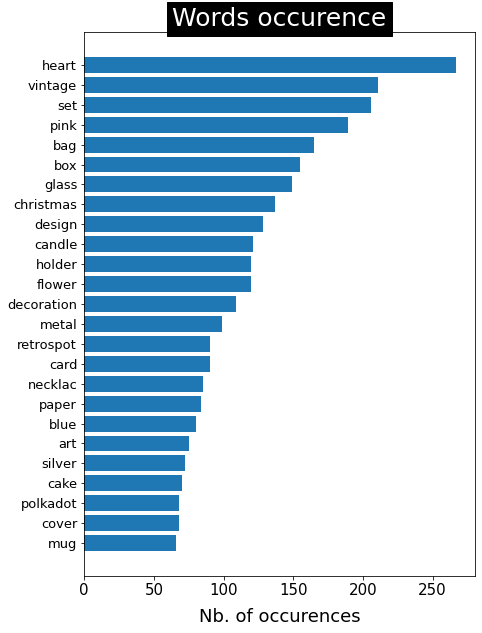

In [ ]:
import matplotlib.pyplot as plt

liste = list_products
N_words = 25

#
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 10))
y_axis = [i[1] for i in liste[:N_words]]
x_axis = [k for k,i in enumerate(liste[:N_words])]
x_label = [i[0] for i in liste[:N_words]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

#
plt.title("Words occurence", bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

## 3.4) Remove urrelevant words
There are about 1480 keywords, but some of them are useless like color names (e.g. red, blue, green...). That's why we discard keywords which are too short (less than 3 charaters), colors, occur less than 13 times, or contain '+', '/'. Make sure that you have 193 words after this step.

In [ ]:
# get rid of 'useless' words that are colors or too short, or occur less than 13 times
# or contain '+', '/'
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'green', 'blue', 'orange', 'tag']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

# 
list_products.sort(key = lambda x:x[1], reverse = True)
print([v[0] for v in list_products])
print('kept words:', len(list_products))

['heart', 'vintage', 'set', 'bag', 'box', 'glass', 'christmas', 'design', 'candle', 'holder', 'flower', 'decoration', 'metal', 'retrospot', 'card', 'necklac', 'paper', 'art', 'silver', 'cake', 'polkadot', 'cover', 'mug', 'tin', 'wrap', 'sign', 'pack', 'egg', 'bracelet', 'star', 'bowl', 'mini', 'tea', 'garden', 'wall', 'ivory', 'cushion', 'frame', 'mirror', 'cream', 'home', 'gift', 'earrings', 'ring', 'bird', 'bottle', 'clock', 'paisley', 'letter', 'party', 'charm', 'wood', 'ribbon', 'jar', 'garland', 'hook', 'gold', 'easter', 'bead', 'drawer', 'cup', 'zinc', 'water', 'photo', 'bell', 'plate', 'tray', 'pencil', 'skull', 'spot', 'butterfly', 'children', 'case', 'enamel', 'round', 'tissue', 'sweetheart', 'stand', 'sticker', 'spaceboy', 'light', 'cutlery', 'diamante', 'union', 'rabbit', 'magnet', 'tree', 'pantry', 'lunch', 'pot', 'colour', 'storage', 'book', 'bunny', 'chocolate', 'basket', 'birthday', 'cat', 'hair', 'feltcraft', 'coffee', 'dog', 'fairy', 'trinket', 'gingham', 'flock', 'doo

In [ ]:
d = {'a': 3, 'b': 2}
d.items()

dict_items([('a', 3), ('b', 2)])

In [ ]:
list_products

## 3.5) Encoding of words
**Task**: define a matrix `X` with 193 columns - 193 key words above as categories rows correspond to items of unique_products (unique descriptions of the cleaned data): 
For each unique description (you should have 3878 of them) and for each 193 of key words you need to get 0 or 1: is this word in this description or not.


In [ ]:
unique_products = df_cleaned['Description'].unique()
print(unique_products[0])
print('white' in unique_products[0])
print('white'.upper() in unique_products[0])

WHITE HANGING HEART T-LIGHT HOLDER
False
True


In [ ]:
len(list_products)

193

In [ ]:
unique_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), unique_products))
print(X.shape)
X.head()

(3878, 193)


,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,flower,decoration,metal,retrospot,card,necklac,paper,art,silver,cake,polkadot,cover,mug,tin,wrap,sign,pack,egg,bracelet,star,bowl,mini,tea,garden,wall,ivory,cushion,frame,mirror,cream,...,travel,doilies,biscuit,regency,hen,jigsaw,rack,coaster,money,cottage,incense,crystal,medium,dish,image,picture,wooden,piece,bathroom,girl,fruit,childs,pan,food,orbit,alphabet,toadstool,time,milk,funky,tidy,plant,diner,house,square,craft,lace,jewel,wallet,point
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.6) Range of UnitPrice feature
We want to add new feature: how expensive is one unit of our stock. We want to make several features: price in regions: $[0,1], [1,2], [2,3], [3,5], [5,10], [10,\infty)$

***Note***: it can spend some time, try on small ammount of data first


In [ ]:
# add price ranges
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

X.head()

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,flower,decoration,metal,retrospot,card,necklac,paper,art,silver,cake,polkadot,cover,mug,tin,wrap,sign,pack,egg,bracelet,star,bowl,mini,tea,garden,wall,ivory,cushion,frame,mirror,cream,...,rack,coaster,money,cottage,incense,crystal,medium,dish,image,picture,wooden,piece,bathroom,girl,fruit,childs,pan,food,orbit,alphabet,toadstool,time,milk,funky,tidy,plant,diner,house,square,craft,lace,jewel,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
label_col

['0<.<1', '1<.<2', '2<.<3', '3<.<5', '5<.<10', '.>10']

In [ ]:
for i, prod in enumerate(unique_products):
    price = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while price > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

X.head()

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,flower,decoration,metal,retrospot,card,necklac,paper,art,silver,cake,polkadot,cover,mug,tin,wrap,sign,pack,egg,bracelet,star,bowl,mini,tea,garden,wall,ivory,cushion,frame,mirror,cream,...,rack,coaster,money,cottage,incense,crystal,medium,dish,image,picture,wooden,piece,bathroom,girl,fruit,childs,pan,food,orbit,alphabet,toadstool,time,milk,funky,tidy,plant,diner,house,square,craft,lace,jewel,wallet,point,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 3.7) Number of products for each price range
**Task:** Show the number of products per price range.

In [ ]:
# numbers of products in different ranges
# in fact we use the number of products in different ranges to choose the appropriate ranges
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):   
    print("{:<10}  {:<20}".format(label_col[i], X.loc[:, label_col[i]].sum()))

range    number of products   
--------------------
0<.<1       964                 
1<.<2       1009                
2<.<3       673                 
3<.<5       606                 
5<.<10      470                 
.>10        156                 


##3.8) Creating clusters of products

In this section, we group the products into different classes. 

In the case of matrices with binary encoding, the most suitable metric for the calculation of distances is the <a href='https://en.wikipedia.org/wiki/Hamming_distance'>Hamming distance. </a>

Here we simply use Euclidean distance with kmeans. To choose approximately the number of clusters that best describes the data, we use the silhouette score:

For n_clusters = 3 The average silhouette_score is : 0.10158702596012364
For n_clusters = 4 The average silhouette_score is : 0.1268004588393788
For n_clusters = 5 The average silhouette_score is : 0.14740815062347604
For n_clusters = 6 The average silhouette_score is : 0.14509988406712557
For n_clusters = 7 The average silhouette_score is : 0.1496577731781852
For n_clusters = 8 The average silhouette_score is : 0.15342109568144105
For n_clusters = 9 The average silhouette_score is : 0.15676226373834637
For n_clusters = 10 The average silhouette_score is : 0.14118594547801286
For n_clusters = 11 The average silhouette_score is : 0.1566832090363316
For n_clusters = 12 The average silhouette_score is : 0.15043572322601764
For n_clusters = 13 The average silhouette_score is : 0.14011744875347013
For n_clusters = 14 The average silhouette_score is : 0.1360620243589594


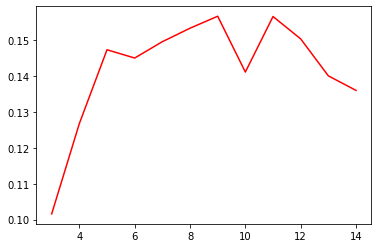

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

matrix = X.values
Silhouettes = []
N=[]
for n_clusters in range(3,15):
    N.append(n_clusters)
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=1000)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    Silhouettes.append(silhouette_avg)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

plt.plot(N, Silhouettes, c='r')

The scores obtained above can be considered equivalent since, depending on the run, scores of 0.1±0.05 will be obtained for all clusters with n_clusters > 3. 
On the other hand, beyond 5 clusters, some clusters contained very few elements. We therefore choose to separate the dataset into 5 clusters. 

## 3.9) Adjust the model
As you remember, K-means can converge to local minimum, and sometimes it is usefull to run it several times to get better silhouette score. Choose treshold equal to 0.145 (or more) and achieve score better than this number. Investigate nuber of elements in clusters.

In [ ]:
silhouette_avg = -1
n_clusters = 5
while silhouette_avg < 0.147:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

pd.Series(clusters).value_counts()

For n_clusters = 5 The average silhouette_score is : 0.1456307025835938
For n_clusters = 5 The average silhouette_score is : 0.14740815062347604


3    1009
1     964
2     673
4     626
0     606
dtype: int64

In [ ]:
features = X.keys()
for center in kmeans.cluster_centers_:
   features_dict = {features[i]:center[i] for i in range(len(features))}
   sorted_features = sorted(features_dict.items(), key =lambda kv:(-kv[1], kv[0]))
   sorted_features = [f[0] for f in sorted_features]
   print(sorted_features[:7])

['1<.<2', 'art', 'set', 'heart', 'sign', 'vintage', 'bag']
['2<.<3', 'art', 'bag', 'set', 'sign', 'pot', 'box']
['0<.<1', 'art', 'card', 'christmas', 'heart', 'wrap', 'decoration']
['3<.<5', 'art', 'set', 'heart', 'pot', 'vintage', 'glass']
['5<.<10', '.>10', 'art', 'lace', 'necklac', 'wall', 'glass']


## 3.10) Plot 
Plot the [silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) scores:

In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

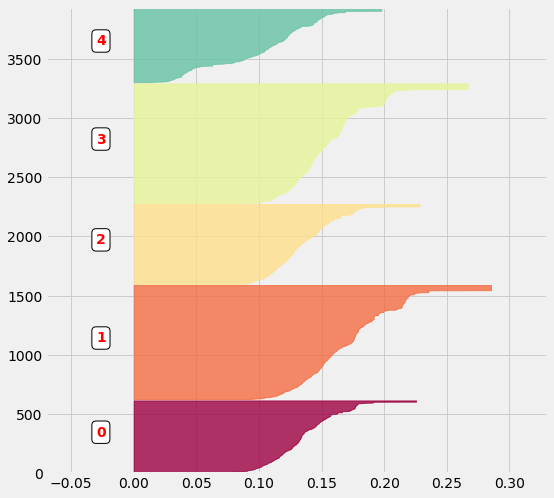

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)

# and the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

## 3.11) Save data
Save variables `Matrix_X.csv` and `clusters` to your google drive

In [ ]:
X.to_csv(relative_path + 'Matrix_X.csv')
(pd.Series(clusters)).to_csv(relative_path + 'Matrix_X_clusters.csv', header = 'False')